In [1]:
import os
import sys
import time

from data.constants import saved_sessions_root
from data.generate import build
from data.load import (get_testing_set, get_training_set, get_validation_set,
                       load_sets_from_file)
from models.models import ConvolutionNeuralNetwork, LogisticRegression, NeuralNetwork
from classifier.helpers import show_stats_from_file
from classifier.models import Classifier
from model_trainer.models import DataForTrainer, DataSet
from data.constants import saved_sessions_root
from models.models import ConvolutionNeuralNetwork, LogisticRegression, NeuralNetwork
from classifier.models import Classifier

% matplotlib inline

datasets = load_sets_from_file()
train_set = DataSet(*get_training_set(datasets, size=15000))
valid_set = DataSet(*get_validation_set(datasets, size=3000))
test_set = DataSet(*get_testing_set(datasets, size=3000))
del datasets

('Training set', (15000, 28, 28, 1), (15000, 10))
('Validation set', (3000, 28, 28, 1), (3000, 10))
('Test set', (3000, 28, 28, 1), (3000, 10))

Step: 0: l=8.130816 l_valid=82.447624 l_test=83.327415 minibatch=10.2% valid=9.7% test=9.9%
Step: 50: l=2.147701 l_valid=2.134842 l_test=2.098549 minibatch=24.2% valid=22.2% test=23.4%
Step: 100: l=1.483196 l_valid=1.221970 l_test=1.052753 minibatch=51.6% valid=61.5% test=68.2%
Step: 150: l=0.851972 l_valid=0.872296 l_test=0.662825 minibatch=74.2% valid=73.7% test=81.0%
Step: 200: l=1.060841 l_valid=0.734729 l_test=0.531802 minibatch=68.8% valid=78.4% test=84.2%
Step: 250: l=0.949453 l_valid=0.670043 l_test=0.474105 minibatch=71.1% valid=79.8% test=86.4%
Step: 300: l=0.739090 l_valid=0.655577 l_test=0.455235 minibatch=77.3% valid=80.2% test=86.3%
Step: 350: l=0.952847 l_valid=0.620410 l_test=0.422311 minibatch=75.8% valid=81.2% test=87.9%
Step: 400: l=0.823077 l_valid=0.584159 l_test=0.388605 minibatch=78.1% valid=82.9% test=88.5%
Step: 450: l

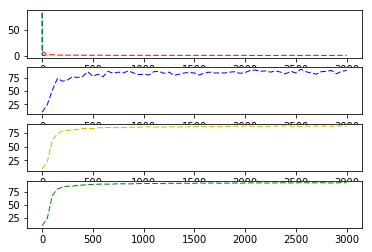

In [3]:
# This is for the convolutional network configuration:
data_for_trainer = DataForTrainer(train_set, valid_set, test_set, with_depth=True)
model = ConvolutionNeuralNetwork()
classifier = Classifier(model)
classifier.train(data_for_trainer)
classifier.stats()

In [ ]:
# This is for the neural network configuration:
data_for_trainer = DataForTrainer(train_set, valid_set, test_set)
model = NeuralNetwork()
classifier = Classifier(model)
classifier.train(data_for_trainer)
classifier.stats()

('Training set', (15000, 784), (15000, 10))
('Validation set', (3000, 784), (3000, 10))
('Test set', (3000, 784), (3000, 10))

Step: 0: l=18.075836 l_valid=13.018366 l_test=12.828445 minibatch=5.5% valid=12.1% test=12.2%
Step: 10: l=5.477384 l_valid=5.041883 l_test=4.294610 minibatch=42.2% valid=44.3% test=47.9%
Step: 20: l=3.988444 l_valid=3.720136 l_test=2.912989 minibatch=53.1% valid=56.0% test=61.3%
Step: 30: l=4.256895 l_valid=3.235659 l_test=2.378667 minibatch=59.4% valid=62.2% test=67.8%
Step: 40: l=3.025557 l_valid=2.946611 l_test=2.092918 minibatch=68.0% valid=65.3% test=71.1%
Step: 50: l=2.342027 l_valid=2.783382 l_test=1.932386 minibatch=68.8% valid=67.6% test=73.9%
Step: 60: l=3.500769 l_valid=2.645186 l_test=1.805653 minibatch=64.8% valid=69.0% test=75.7%
Step: 70: l=3.241090 l_valid=2.560663 l_test=1.726669 minibatch=65.6% valid=70.4% test=76.6%
Step: 80: l=2.348875 l_valid=2.428954 l_test=1.642911 minibatch=70.3% valid=71.5% test=77.5%
Step: 90: l=2.986701 l_valid=2.3602

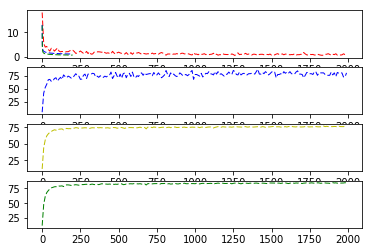

In [2]:
# This is for the logistic regression:
data_for_trainer = DataForTrainer(train_set, valid_set, test_set)
model = LogisticRegression()
classifier = Classifier(model)
classifier.train(data_for_trainer)
classifier.stats()